In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import cv2 as cv

In [2]:
df = pd.read_csv('train.csv')

# count_patients = df.patient_id.unique().size

print("Columns:", df.columns)
print("Number of samples:", len(df))
print("Number of samples with cancer:", len(df[df["cancer"]==1]))
print("Number of samples with no cancer:", len(df[df["cancer"]==0]))
# print("Number of patients:", count_patients)

#laterality = left or right
# density = A rating for how dense the breast tissue is,
#           A being the least dense and D being the most dense. Extremely dense tissue can make diagnosis more difficult. 


Columns: Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density',
       'machine_id', 'difficult_negative_case'],
      dtype='object')
Number of samples: 54706
Number of samples with cancer: 1158
Number of samples with no cancer: 53548


In [3]:
print(df) 

       site_id  patient_id    image_id laterality view   age  cancer  biopsy  \
0            2       10006   462822612          L   CC  61.0       0       0   
1            2       10006  1459541791          L  MLO  61.0       0       0   
2            2       10006  1864590858          R  MLO  61.0       0       0   
3            2       10006  1874946579          R   CC  61.0       0       0   
4            2       10011   220375232          L   CC  55.0       0       0   
...        ...         ...         ...        ...  ...   ...     ...     ...   
54701        1        9973  1729524723          R  MLO  43.0       0       0   
54702        1        9989    63473691          L  MLO  60.0       0       0   
54703        1        9989  1078943060          L   CC  60.0       0       0   
54704        1        9989   398038886          R  MLO  60.0       0       0   
54705        1        9989   439796429          R   CC  60.0       0       0   

       invasive  BIRADS  implant densit

In [4]:
df[df["age"] <27]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
14092,1,2509,625210893,L,MLO,26.0,0,0,0,1.0,0,C,49,False
14093,1,2509,1208943812,L,CC,26.0,0,0,0,1.0,0,C,49,False
14094,1,2509,306988913,R,CC,26.0,0,0,0,1.0,0,C,49,False
14095,1,2509,333249722,R,MLO,26.0,0,0,0,1.0,0,C,49,False
14096,1,2509,1378018965,R,CC,26.0,0,0,0,1.0,0,C,49,False
33117,1,45445,220405938,L,CC,26.0,0,0,0,NaN,0,D,49,False
33118,1,45445,1491259172,L,MLO,26.0,0,0,0,NaN,0,D,49,False
33119,1,45445,1535427552,L,CC,26.0,0,0,0,NaN,0,D,49,False
33120,1,45445,11820476,R,MLO,26.0,0,0,0,0.0,0,D,49,True
33121,1,45445,999868467,R,CC,26.0,0,0,0,0.0,0,D,49,True


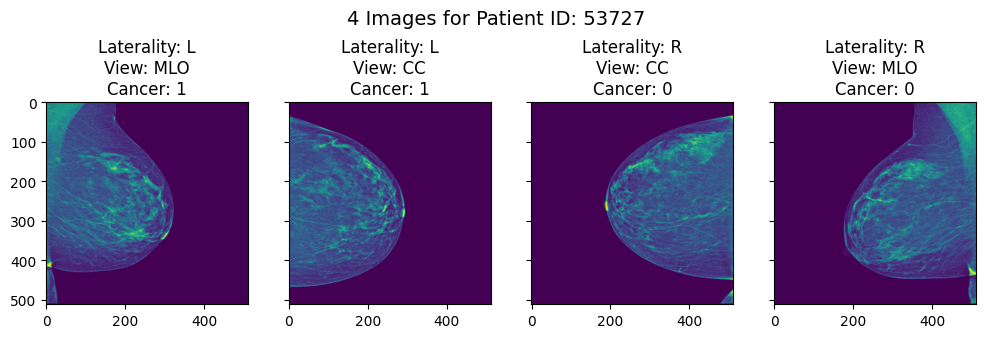

In [5]:
# get a patient's image with patient ID

selected_patient_id = 53727
# selected_patient_id = 10049
selected_patient_df = df.loc[df["patient_id"] == selected_patient_id]
# print(selected_patient_df)
image_count_selected_patient = len(df.loc[df["patient_id"] == selected_patient_id])

img_links = []
for index, row in selected_patient_df.iterrows():
    img_file_name = str(row["patient_id"])+"_"+str(row["image_id"])+".png"
    # print('/images/'+img_file_name)
    img = np.asarray(Image.open('images/'+img_file_name))
    img_links.append(img_file_name)



f, axarr = plt.subplots(1, image_count_selected_patient, 
                        sharey=True,
                        figsize=(12, 4))
f.suptitle(f'{image_count_selected_patient} Images for Patient ID: {selected_patient_id}', fontsize=14)

counter_img = 0
for index, row in selected_patient_df.iterrows():
    img = np.asarray(Image.open('images/'+img_links[counter_img]))
    axarr[counter_img].imshow(img)
    axarr[counter_img].set_title("Laterality: "+str(row["laterality"])+"\n"+
                                "View: "+str(row["view"])+"\n"+
                                "Cancer: "+str(row["cancer"]))
    counter_img+=1



In [8]:
# copy images to new folder

img_w_cancer = 0
img_w_no_cancer = 0

target_path_0 = "rsna_dset_1/0/"
target_path_1 = "rsna_dset_1/1/"

# for index, row in df.iterrows():
#     img_file_name = str(row["patient_id"])+"_"+str(row["image_id"])+".png"
    
#     if row["cancer"] == 1:
#         shutil.copy('images/'+img_file_name, target_path_1+img_file_name)
#         img_w_cancer +=1

#     if row["cancer"] == 0:
#         shutil.copy('images/'+img_file_name, target_path_0+img_file_name)
#         img_w_no_cancer +=1
    
print(img_w_cancer)
print(img_w_no_cancer)

imgs_in_folder0 = len(os.listdir(target_path_0))
imgs_in_folder1 = len(os.listdir(target_path_1))
print(imgs_in_folder0)
print(imgs_in_folder1)

0
0
53548
1158


In [9]:
print(os.listdir(target_path_0))

['10006_1459541791.png', '10006_1864590858.png', '10006_1874946579.png', '10006_462822612.png', '10011_1031443799.png', '10011_220375232.png', '10011_270344397.png', '10011_541722628.png', '10025_1365269360.png', '10025_288394860.png', '10025_562340703.png', '10025_893612858.png', '10038_1350492010.png', '10038_1967300488.png', '10038_2142944869.png', '10038_850559196.png', '10042_102733848.png', '10042_1648588715.png', '10042_202939811.png', '10042_294481519.png', '10042_495770405.png', '10048_1234933874.png', '10048_1577142909.png', '10048_1842203124.png', '10048_964141995.png', '10049_1207499426.png', '10049_1351270472.png', '10049_1464813991.png', '10049_349510516.png', '10049_906829939.png', '10049_94335194.png', '10050_1428987847.png', '10050_1614607569.png', '10050_1749389520.png', '10050_588678397.png', '10051_1238319934.png', '10051_2046475482.png', '10051_833024366.png', '10051_938549206.png', '10086_1479874325.png', '10086_1973073874.png', '10086_2029358943.png', '10086_5108

In [10]:
patient_ids_path0 = []
patient_ids_path1 = []
patients_ids_common = []


for path0_file in os.listdir(target_path_0):
    # print(path0_file.split("_")[0])
    patient_ids_path0.append(path0_file.split("_")[0])

for path1_file in os.listdir(target_path_1):
    # print(path1_file.split("_")[0])
    patient_ids_path1.append(path1_file.split("_")[0])

for patient_id_path0 in patient_ids_path0:
   for patient_id_path1 in patient_ids_path1: 
        if (patient_id_path0 == patient_id_path1) and (patient_id_path1 not in patients_ids_common):
           patients_ids_common.append(patient_id_path1)
           break
    




In [11]:
print("Number of files in path0:",len(patient_ids_path0))
print("Number of files in path1:",len(patient_ids_path1))

unique_patient_ids_path0 = list(set(patient_ids_path0)) 
unique_patient_ids_path1 = list(set(patient_ids_path1)) 
unique_patient_ids_path1 = list(set(patient_ids_path1)) 
print("Number of patients in path0:",len(unique_patient_ids_path0))
print("Number of patients in path1:",len(unique_patient_ids_path1))
print("Number of patients whose images sharedin both files:",len(patients_ids_common))

print(unique_patient_ids_path0)
print(unique_patient_ids_path1)
print(patients_ids_common)

Number of files in path0: 53548
Number of files in path1: 1158
Number of patients in path0: 11907
Number of patients in path1: 486
Number of patients whose images sharedin both files: 480
['17884', '36942', '48271', '9069', '23065', '32272', '31144', '10541', '2541', '26284', '5437', '31227', '46381', '36304', '58006', '15525', '63352', '45592', '17586', '596', '39392', '12026', '19085', '49621', '55987', '27667', '56477', '31774', '64766', '39909', '56013', '50002', '30112', '26522', '27742', '53050', '58069', '4208', '30546', '45391', '35715', '33443', '34110', '20227', '20476', '42125', '40789', '13695', '31465', '12616', '3878', '41358', '30742', '4739', '53844', '61147', '11890', '15458', '22931', '12125', '12005', '39878', '48099', '10049', '65285', '42704', '29660', '43083', '54092', '58897', '25210', '38876', '39645', '34423', '17078', '35147', '22023', '57175', '57882', '54084', '32952', '21132', '49199', '41936', '58040', '30800', '56100', '5933', '60902', '25411', '48994', '

In [47]:
patient_id_cancer_duolist = []

for index,row in df.iterrows():
    # print(row["patient_id"], row["cancer"])
    patient_id_cancer_duolist.append([row["patient_id"],row["cancer"]])

print(patient_id_cancer_duolist)

[[10006, 0], [10006, 0], [10006, 0], [10006, 0], [10011, 0], [10011, 0], [10011, 0], [10011, 0], [10025, 0], [10025, 0], [10025, 0], [10025, 0], [10038, 0], [10038, 0], [10038, 0], [10038, 0], [10042, 0], [10042, 0], [10042, 0], [10042, 0], [10042, 0], [10048, 0], [10048, 0], [10048, 0], [10048, 0], [10049, 0], [10049, 0], [10049, 0], [10049, 0], [10049, 0], [10049, 0], [10050, 0], [10050, 0], [10050, 0], [10050, 0], [10051, 0], [10051, 0], [10051, 0], [10051, 0], [10086, 0], [10086, 0], [10086, 0], [10086, 0], [10095, 0], [10095, 0], [10095, 0], [10095, 0], [10097, 0], [10097, 0], [10097, 0], [10097, 0], [10097, 0], [10097, 0], [10102, 0], [10102, 0], [10102, 0], [10102, 0], [10102, 0], [10102, 0], [10102, 0], [10102, 0], [10106, 0], [10106, 0], [10106, 0], [10106, 0], [10116, 0], [10116, 0], [10116, 0], [10116, 0], [10119, 0], [10119, 0], [10119, 0], [10119, 0], [10122, 0], [10122, 0], [10122, 0], [10122, 0], [10124, 0], [10124, 0], [10124, 0], [10124, 0], [10126, 0], [10126, 0], [10

In [52]:
print(0 or 0)

0


In [55]:
unique_patient_id_cancer_duolist = []

for i in range(len(patient_id_cancer_duolist)):
    new_id = patient_id_cancer_duolist[i][0]
    if i < len(patient_id_cancer_duolist)-1:
        if new_id == patient_id_cancer_duolist[i+1][0]: # if next is the same patient:
            cancer_sum = patient_id_cancer_duolist[i][1] or patient_id_cancer_duolist[i+1][1]
            sub_patient_list = [new_id, cancer_sum]

        if new_id != patient_id_cancer_duolist[i+1][0]: # if next is the same patient:
            unique_patient_id_cancer_duolist.append(sub_patient_list)
            sub_patient_list = []
            cancer_sum = patient_id_cancer_duolist[i][1] or patient_id_cancer_duolist[i+1][1]
            sub_patient_list = [new_id, cancer_sum]

print(unique_patient_id_cancer_duolist)
print(len(unique_patient_id_cancer_duolist))
            

[[10006, 0], [10011, 0], [10025, 0], [10038, 0], [10042, 0], [10048, 0], [10049, 0], [10050, 0], [10051, 0], [10086, 0], [10095, 0], [10097, 0], [10102, 0], [10106, 0], [10116, 0], [10119, 0], [10122, 0], [10124, 0], [10126, 0], [10130, 0], [10132, 0], [10136, 0], [1014, 0], [10144, 0], [1015, 0], [10151, 0], [10152, 0], [10153, 0], [10175, 0], [10179, 0], [10182, 0], [10183, 0], [10185, 0], [10188, 0], [10198, 0], [10200, 0], [10208, 0], [10215, 0], [10217, 0], [10219, 0], [10223, 0], [10224, 0], [10226, 0], [10232, 0], [10234, 0], [10240, 0], [10243, 0], [1025, 0], [10257, 0], [1026, 0], [10267, 0], [10273, 0], [1028, 0], [10282, 0], [10285, 0], [10289, 0], [10302, 0], [10308, 0], [10309, 0], [10314, 0], [10315, 0], [10317, 0], [10322, 0], [10324, 0], [10328, 0], [10329, 0], [10335, 0], [10342, 0], [10353, 0], [10355, 0], [10359, 0], [1036, 0], [10363, 0], [10366, 0], [10383, 0], [10385, 0], [10388, 0], [10391, 0], [10394, 0], [10399, 0], [10401, 0], [10404, 0], [10406, 0], [10407, 0

In [17]:
df[df["patient_id"]==10130]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
87,1,10130,388811999,L,MLO,71.0,1,1,1,0.0,0,B,49,False
88,1,10130,613462606,L,CC,71.0,1,1,1,0.0,0,B,49,False
89,1,10130,1360338805,L,CC,71.0,1,1,1,0.0,0,B,49,False
90,1,10130,1672636630,L,MLO,71.0,1,1,1,0.0,0,B,49,False
91,1,10130,1013166704,R,CC,71.0,0,0,0,NaN,0,B,49,False
92,1,10130,1165309236,R,CC,71.0,0,0,0,NaN,0,B,49,False
93,1,10130,2110820077,R,MLO,71.0,0,0,0,NaN,0,B,49,False


In [20]:
df.insert(len(df.columns),"patient_cancer",0)

In [21]:
df[df["patient_id"]==10130]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,patient_cancer
87,1,10130,388811999,L,MLO,71.0,1,1,1,0.0,0,B,49,False,0
88,1,10130,613462606,L,CC,71.0,1,1,1,0.0,0,B,49,False,0
89,1,10130,1360338805,L,CC,71.0,1,1,1,0.0,0,B,49,False,0
90,1,10130,1672636630,L,MLO,71.0,1,1,1,0.0,0,B,49,False,0
91,1,10130,1013166704,R,CC,71.0,0,0,0,NaN,0,B,49,False,0
92,1,10130,1165309236,R,CC,71.0,0,0,0,NaN,0,B,49,False,0
93,1,10130,2110820077,R,MLO,71.0,0,0,0,NaN,0,B,49,False,0


In [ ]:
unique_ids_list = df["patient_id"].tolist()
print(unique_ids_list)
print(len(unique_ids_list))

unique_ids_list = list(set(df["patient_id"].tolist()))
print(unique_ids_list)
print(len(unique_ids_list))

In [ ]:
# seperate files into three folders 
# folder 1: only 0 patients
# folder 2: only 1 patinets
# folder 3: both 0-1 patients

# copy images to new folder

img_w_cancer = 0
img_w_no_cancer = 0

target_path_only0 = "rsna_dset_2/only0/"
target_path_only1 = "rsna_dset_2/only1/"
target_path_both01 = "rsna_dset_2/both01/"

for index, row in df.iterrows():
    img_file_name = str(row["patient_id"])+"_"+str(row["image_id"])+".png"
    
    if row["cancer"] == 1:
        shutil.copy('images/'+img_file_name, target_path_1+img_file_name)
        img_w_cancer +=1

    if row["cancer"] == 0:
        shutil.copy('images/'+img_file_name, target_path_0+img_file_name)
        img_w_no_cancer +=1
    
print(img_w_cancer)
print(img_w_no_cancer)

imgs_in_folder0 = len(os.listdir(target_path_0))
imgs_in_folder1 = len(os.listdir(target_path_1))
print(imgs_in_folder0)
print(imgs_in_folder1)